In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# PCA Use case:

### 1) Feature Extraction : Convert higher dimension data into lower dimension by retaining the performance of model
### 2) Visualization : Convert higher dimension data into lower dimension so that we can visualize it graphically. 

### Feature Extraction

In [4]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# One image has 28*28 = 784 pixels and there are total 42000 images. One column is of label
df.shape

(42000, 785)

In [4]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
17586,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


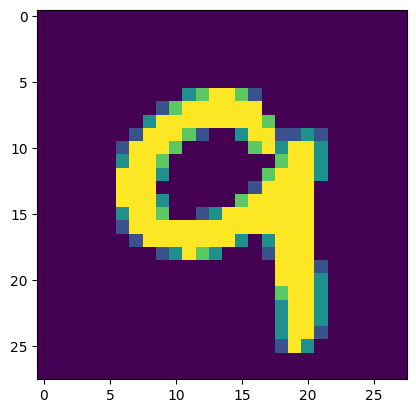

In [5]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[35493,1:].values.reshape(28,28)) 

In [5]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape

(33600, 784)

In [9]:
y_train.shape

(33600,)

### This kaggle dataset has no missing data and its perfect for model training

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn=KNeighborsClassifier() # default settings

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
import time 
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

12.991340637207031


In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy Score before PCA: ",accuracy_score(y_test,y_pred)) # 96% 

Accuracy Score before PCA:  0.9648809523809524


### As no of features is very high in this dataset. We will apply PCA to reduce dimension but the accuracy will remain same.

# PCA

In [15]:
# step 1 : Standardized the dataset (mean centered)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
# step 2 :  apply pca
from sklearn.decomposition import PCA

In [17]:
# pca=PCA(n_components=None) # we got principal components = total features in original data
pca=PCA(n_components=100)

In [18]:
# Here eigen values and eigen vectors will be calculated. Coordinated system will transform based on eigen vector.  
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [19]:
X_train.shape,X_test.shape  # actual training data with 784 features 

((33600, 784), (8400, 784))

In [20]:
X_train_trf.shape,X_test_trf.shape # transformed using pca, training data with 100 features 

((33600, 100), (8400, 100))

In [21]:
knn=KNeighborsClassifier()

In [22]:
knn.fit(X_train_trf,y_train)
y_pred=knn.predict(X_test_trf)

In [23]:
print("Accuracy Score after PCA: ",accuracy_score(y_test,y_pred)) # 95% 

Accuracy Score after PCA:  0.9545238095238096


In [25]:
# we can run a loop and check the best possible accuracy 
for i in range(1,785):
    pca=PCA(n_components=i)

    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)

    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred=knn.predict(X_test_trf)
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Accuracy Score :  0.25797619047619047
Accuracy Score :  0.3238095238095238
Accuracy Score :  0.5103571428571428
Accuracy Score :  0.6663095238095238
Accuracy Score :  0.7382142857142857
Accuracy Score :  0.8220238095238095
Accuracy Score :  0.8435714285714285
Accuracy Score :  0.8728571428571429
Accuracy Score :  0.886547619047619
Accuracy Score :  0.9063095238095238
Accuracy Score :  0.9111904761904762
Accuracy Score :  0.9175
Accuracy Score :  0.9271428571428572
Accuracy Score :  0.9353571428571429
Accuracy Score :  0.9379761904761905
Accuracy Score :  0.9372619047619047
Accuracy Score :  0.9410714285714286
Accuracy Score :  0.9407142857142857
Accuracy Score :  0.9441666666666667
Accuracy Score :  0.9430952380952381
Accuracy Score :  0.9432142857142857
Accuracy Score :  0.9436904761904762
Accuracy Score :  0.945
Accuracy Score :  0.9464285714285714
Accuracy Score :  0.9473809523809524
Accuracy Score :  0.9491666666666667
Accuracy Score :  0.9473809523809524
Accuracy Score :  0.946785

### Visualization

In [11]:
# transforming to a 2-d coordinate system
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [13]:
X_train_trf

array([[-226.60370116,  305.89464069],
       [  38.33698356, -461.08968276],
       [-305.49525384, -351.67577395],
       ...,
       [ -28.00268884,  596.0530731 ],
       [ 233.97175942,   18.65131892],
       [1096.50392707, -254.71794505]])

In [18]:
# use plotly for dynamic visualization : On hovering point, coordinates will appear.
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],
              y=X_train_trf[:,1],
              color=y_train_trf,
              color_discrete_sequence=px.colors.qualitative.G10
              )
fig.show()

In [19]:
# transforming in 3d
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [21]:
X_train_trf

array([[-226.60596795,  305.90785112,  417.17612467],
       [  38.33615961, -461.11980514,  100.37496999],
       [-305.49266471, -351.65738963, -961.35470101],
       ...,
       [ -28.00136018,  596.02763153,  606.21869234],
       [ 233.97098577,   18.64070063, -148.26216325],
       [1096.50696251, -254.79196679, -560.3425199 ]])

In [23]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(x=X_train_trf[:,0],
              y=X_train_trf[:,1],
              z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

### pca attributes

In [24]:
# value of eigen values (top 3)
pca.explained_variance_

array([335506.57620387, 244807.10421104, 212051.03430977])

In [25]:
# value of eigen vectors (top 3)
pca.components_

array([[-7.10840940e-18, -3.18596765e-19, -1.19691622e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 6.06230598e-18,  2.42262836e-19,  6.72928903e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.50863258e-17, -1.59952092e-17, -4.75892538e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

### explained_variance

In [26]:
pca=PCA(n_components=None) # 784 principal components
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [27]:
# total 784 eigen values
pca.explained_variance_

array([3.35506576e+05, 2.44807105e+05, 2.12051035e+05, 1.85066153e+05,
       1.68000246e+05, 1.48918349e+05, 1.12510833e+05, 9.93294844e+04,
       9.51402644e+04, 7.99789771e+04, 7.18729893e+04, 7.02954186e+04,
       5.86421706e+04, 5.77978479e+04, 5.44160811e+04, 5.10942763e+04,
       4.54324809e+04, 4.40877557e+04, 4.06349678e+04, 3.95293850e+04,
       3.69465718e+04, 3.51694514e+04, 3.31919492e+04, 3.14980784e+04,
       3.03792806e+04, 2.86216441e+04, 2.79878549e+04, 2.66233147e+04,
       2.54782977e+04, 2.38073682e+04, 2.26921743e+04, 2.17431167e+04,
       2.07130988e+04, 2.02157853e+04, 1.92920932e+04, 1.85377184e+04,
       1.74405813e+04, 1.67269421e+04, 1.61818599e+04, 1.59519157e+04,
       1.55375765e+04, 1.52480605e+04, 1.43023838e+04, 1.35853438e+04,
       1.31721648e+04, 1.28124366e+04, 1.23858612e+04, 1.19793099e+04,
       1.14757321e+04, 1.09198370e+04, 1.07891523e+04, 1.05497976e+04,
       1.00392867e+04, 9.83967219e+03, 9.58435154e+03, 9.24819162e+03,
      

In [28]:
# total 784 eigen vectors
pca.components_

array([[-1.34432038e-19, -8.32667268e-17,  1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.48703186e-19,  2.77555756e-17, -5.55111512e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.91572717e-19, -5.55111512e-17, -5.55111512e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-0.00000000e+00,  8.22903379e-02, -2.68817333e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00, -5.45481525e-02,  3.41866172e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.95829978e-03, -2.44120649e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [29]:
pca.components_.shape # 784 eigen vectors in 784 dimensional space

(784, 784)

In [30]:
# explained_variance of every eigen value individually
pca.explained_variance_ratio_

array([9.77072202e-02, 7.12934512e-02, 6.17541312e-02, 5.38955140e-02,
       4.89255299e-02, 4.33684433e-02, 3.27657386e-02, 2.89270270e-02,
       2.77070300e-02, 2.32917149e-02, 2.09310651e-02, 2.04716403e-02,
       1.70779469e-02, 1.68320607e-02, 1.58472125e-02, 1.48798267e-02,
       1.32309818e-02, 1.28393670e-02, 1.18338358e-02, 1.15118647e-02,
       1.07596902e-02, 1.02421519e-02, 9.66625789e-03, 9.17296381e-03,
       8.84714420e-03, 8.33528008e-03, 8.15070612e-03, 7.75332066e-03,
       7.41986542e-03, 6.93325236e-03, 6.60848230e-03, 6.33209492e-03,
       6.03213006e-03, 5.88730096e-03, 5.61830060e-03, 5.39860932e-03,
       5.07909781e-03, 4.87126968e-03, 4.71252924e-03, 4.64556419e-03,
       4.52489910e-03, 4.44058540e-03, 4.16518263e-03, 3.95636411e-03,
       3.83603691e-03, 3.73127577e-03, 3.60704723e-03, 3.48865016e-03,
       3.34199674e-03, 3.18010732e-03, 3.14204894e-03, 3.07234334e-03,
       2.92367086e-03, 2.86553852e-03, 2.79118328e-03, 2.69328579e-03,
      

In [31]:
# now apply cummulative sum. So that total explained_variance percentage >= 90% and then we get the optimal value of n_components
np.cumsum(pca.explained_variance_ratio_)

array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360

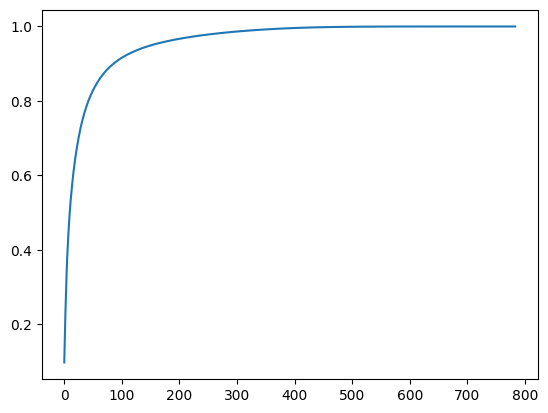

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # now observe the optimum value of n_components
# 90% is around 200 and 95% is around 400